# 使用Cifar10練習影像分類，遷移學習

In [1]:
#匯入函式庫，數值矩陣計算numpy，以及畫圖用的matplotlib
import numpy as np
import matplotlib.pyplot as plt

#匯入
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
#匯入tensorflow的函式庫，以及cifar10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
#使用cifar10的資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
#將訓練的模型放於model_path下的model_name
model_name = 'cirfar10'
save_dir = os.path.join(os.getcwd(), 'saved_models')
 
model_path = os.path.join(save_dir, model_name)

## 作預測

In [5]:
#載入訓練好的模型
model = tf.keras.models.load_model(model_path)

In [6]:
# for layer in model.layers:
#     print(layer.name)

## 將資料餵進模型中間輸出

In [7]:
#選擇某一層layer，讓輸出只到那邊而已，layer_name要看model.summary
layer_name = 'dense'
PCA_model = tf.keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

In [8]:
# #得到該層的權重範例
# t=model.get_layer('dense_2')
# weight,bias=t.get_weights()

In [9]:
# 記得影像要正規化再丟進去
X_test=X_test/255

In [10]:
# 先跑預測
ans=PCA_model.predict(X_test)

In [11]:
# 得到資料數量 * Dense長度的資料
ans.shape

(10000, 16)

## 開始跑PCA

In [12]:
from sklearn.decomposition import PCA

#把n維降成2維
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ans)


In [13]:
principalComponents.shape

(10000, 2)

In [14]:
#這邊先取前1000個點來觀察
x = principalComponents[:1000, 0]

In [15]:
#Y_test[:1000].shape
ans_y=np.squeeze(Y_test)

In [16]:
names=['automobile','bird','cat','deer','dog','frog','horse','ship','truck']

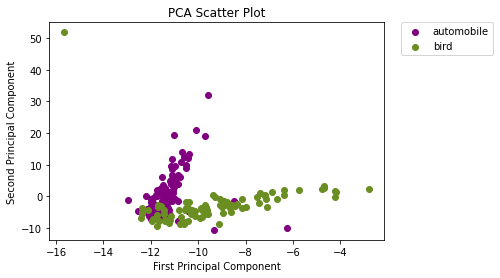

In [19]:
colors = ['black', 'blue', 'purple', 'yellow', 'olivedrab', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = principalComponents[:1000, 0][ans_y[:1000]==i]
    y = principalComponents[:1000, 1][ans_y[:1000]==i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()